In [93]:
import apimoex
import requests

import string

import pandas as pd
import numpy as np

import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.optimize import minimize

from datetime import datetime

import sys
import warnings
warnings.filterwarnings("ignore") 

In [2]:
pip install apimoex

Note: you may need to restart the kernel to use updated packages.


## Часть 1. Parser

In [2]:
base_active = 'Si'
strikes_str = [f'{int(x)}' if x == int(x) else f'{x:.1f}' for x in np.arange(78, 108, 0.5)]
opt_type = 'C' # европейский
months = string.ascii_uppercase[6:] # call: A-L, put: M-X
years = ['3', '4']
weeks_flg = ['', 'A', 'B', 'C', 'D', 'E']

In [3]:
ticket_title = ['Краткий код',
                 'Наименование серии инструмента',
                 'Краткое наименование контракта',
                 'Последний день обращения',
                 'Тип опциона',
                 'Дата исполнения',
                 'Код базового актива',
                 'Начало обращения',
                 'Вид опциона пут или колл',
                 'Цена Страйк',
                 'Исполнение',
                 'Способ исполнения опциона',
                 'Способ маржирования опциона',
                 'Лот',
                 'Наименование контракта',
                 'Группа контрактов',
                 'Котировка',
                 'Базовый актив',
                 'Опционная серия',
                 'Вид/категория ценной бумаги',
                 'Код типа инструмента',
                 'Тип бумаги',
                 'Типа инструмента']

columns_end_of_date = ['BOARDID', 'TRADEDATE', 'SECID', 'OPEN', 'LOW', 'HIGH', 'CLOSE',
                       'OPENPOSITIONVALUE', 'VALUE', 'VOLUME', 'OPENPOSITION', 'SETTLEPRICE',
                       'WAPRICE', 'SETTLEPRICEDAY', 'CHANGE', 'QTY', 'NUMTRADES', 'NAME']

columns_candles = ['open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end', 'name']

In [4]:
RETRY_DELAY = 5 # Задержка в секундах между попытками

ticker_info = pd.DataFrame({'title': ticket_title})
end_day_info = pd.DataFrame(columns=columns_end_of_date)
candles_info = pd.DataFrame(columns=columns_candles)

for year in years:
    time.sleep(0.4)
    print(f'202{year} year is being parsed')
    for month in months:
        print(f'- month: {month}')
        for week in weeks_flg:
            for strike in tqdm(strikes_str, desc=f'Week: {"-" if week == "" else week}'):
                try:
                    with requests.Session() as session:
                        ticker = apimoex.find_security_description(session, f'Si{strike}C{month}{year}{week}')
                        end_day = apimoex.get_board_history(session, f'Si{strike}C{month}{year}{week}', board='ROPD', engine='futures', 
                                                         market='options', columns=None, start='1900-01-01', end='2100-01-01')
                        candles = apimoex.get_market_candles(session, f'Si{strike}C{month}{year}{week}', interval=1, engine='futures', 
                                                          market='options', columns=None, start='1900-01-01', end='2100-01-01')
                        
                        if ticker != [] and end_day != [] and candles != []:
                            print(f'Si{strike}C{month}{year}{week}')
                        
                            ticker_info[f'Si{strike}C{month}{year}{week}'] = pd.DataFrame(ticker)['value']

                            end_day = pd.DataFrame(end_day)
                            end_day['NAME'] = f'Si{strike}C{month}{year}{week}' 
                            end_day_info = end_day_info._append(end_day)

                            candles = pd.DataFrame(candles)
                            candles['name'] = f'Si{strike}C{month}{year}{week}' 
                            candles_info = candles_info._append(candles)

                            print('Saved.')
                except:
                    exc_type, exc_value, exc_traceback = sys.exc_info()
                    print(f"Произошла ошибка типа: {exc_type.__name__}")

2023 year is being parsed
- month: G


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:15<00:33,  1.06it/s]

Si90CG3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:22<00:13,  1.65it/s]

Si96CG3B
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:28<00:00,  2.08it/s]


- month: H


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:21<00:17,  1.33it/s]

Si96CH3
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:12<00:18,  1.86it/s]

Si90CH3A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:13<00:14,  2.13it/s]

Si92CH3A
Saved.


Week: C:  97%|██████████████████████████████████████████████████████████████████████▌  | 58/60 [00:49<00:13,  6.72s/it]

Произошла ошибка типа: ConnectTimeout


Week: E:  35%|█████████████████████████▌                                               | 21/60 [00:18<00:38,  1.00it/s]

Si88CH3E
Saved.


Week: E:  55%|████████████████████████████████████████▏                                | 33/60 [00:29<00:33,  1.24s/it]

Si94CH3E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:48<00:00,  1.25it/s]


- month: I


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:08<00:19,  2.22it/s]

Si86CI3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:21<00:18,  1.27it/s]

Si96CI3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:25<00:08,  1.79it/s]

Si100CI3
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:19<00:09,  2.32it/s]

Si96CI3A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:21<00:07,  2.40it/s]

Si98CI3A
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:17<00:18,  1.46it/s]

Si94CI3B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:20<00:08,  2.16it/s]

Si98CI3B
Saved.


Week: B:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:23<00:08,  1.69it/s]

Si100CI3B
Saved.


Week: D:  28%|████████████████████▋                                                    | 17/60 [00:10<00:26,  1.65it/s]

Si86CI3D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:16<00:25,  1.39it/s]

Si90CI3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:18<00:14,  2.11it/s]

Si92CI3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:24<00:14,  1.62it/s]

Si96CI3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:28<00:12,  1.49it/s]

Si98CI3D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:31<00:00,  1.90it/s]


- month: J


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:07<00:24,  1.78it/s]

Si86CJ3
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:19,  2.04it/s]

Si88CJ3
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:11<00:21,  1.60it/s]

Si90CJ3
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:13<00:18,  1.69it/s]

Si92CJ3
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:15<00:13,  2.05it/s]

Si94CJ3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:18<00:21,  1.07it/s]

Si96CJ3
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:20<00:11,  1.67it/s]

Si98CJ3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:22<00:08,  1.81it/s]

Si100CJ3
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:25<00:06,  1.61it/s]

Si102CJ3
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:27<00:03,  1.82it/s]

Si104CJ3
Saved.


Week: -:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:31<00:02,  1.01it/s]

Si106CJ3
Saved.


Week: A:  28%|████████████████████▋                                                    | 17/60 [00:10<00:22,  1.87it/s]

Si86CJ3A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:12<00:21,  1.82it/s]

Si88CJ3A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:15<00:24,  1.43it/s]

Si90CJ3A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:17<00:16,  1.85it/s]

Si92CJ3A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:19<00:13,  1.99it/s]

Si94CJ3A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:24<00:09,  2.11it/s]

Si98CJ3A
Saved.


Week: A:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:26<00:10,  1.49it/s]

Si100CJ3A
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:11<00:24,  1.41it/s]

Si90CJ3B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:13<00:15,  1.98it/s]

Si92CJ3B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:19<00:08,  2.29it/s]

Si98CJ3B
Saved.


Week: B:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:20<00:07,  2.04it/s]

Si100CJ3B
Saved.


Week: B:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:24<00:08,  1.26it/s]

Si102CJ3B
Saved.


Week: B:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:26<00:04,  1.46it/s]

Si104CJ3B
Saved.


Week: B:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:29<00:02,  1.44it/s]

Si106CJ3B
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:14<00:16,  2.15it/s]

Si90CJ3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:17<00:23,  1.31it/s]

Si92CJ3D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:18<00:13,  1.94it/s]

Si94CJ3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:20<00:11,  1.99it/s]

Si96CJ3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:25<00:17,  1.09it/s]

Si98CJ3D
Saved.


Week: D:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:26<00:07,  1.89it/s]

Si100CJ3D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:30<00:09,  1.21it/s]

Si102CJ3D
Saved.


Week: D:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:32<00:04,  1.65it/s]

Si104CJ3D
Saved.


Week: D:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:36<00:02,  1.16it/s]

Si106CJ3D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:48<00:00,  1.23it/s]


- month: K


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:29<01:00,  1.55s/it]

Si88CK3
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:35<00:47,  1.34s/it]

Si90CK3
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:40<00:37,  1.21s/it]

Si92CK3
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:46<00:42,  1.57s/it]

Si94CK3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:53<00:43,  1.90s/it]

Si96CK3
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [01:00<00:32,  1.70s/it]

Si98CK3
Saved.


Week: A:  22%|███████████████▊                                                         | 13/60 [00:20<01:34,  2.01s/it]

Si84CK3A
Saved.


Week: A:  28%|████████████████████▋                                                    | 17/60 [00:28<01:23,  1.95s/it]

Si86CK3A
Saved.


Week: A:  32%|███████████████████████                                                  | 19/60 [00:52<05:22,  7.87s/it]

Произошла ошибка типа: ConnectTimeout


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:56<03:13,  4.96s/it]

Si88CK3A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [01:08<02:05,  3.58s/it]

Si90CK3A
Saved.


Week: A:  43%|███████████████████████████████▋                                         | 26/60 [01:29<04:59,  8.81s/it]

Произошла ошибка типа: ConnectTimeout


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [01:32<01:59,  3.86s/it]

Si92CK3A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [01:39<01:00,  2.26s/it]

Si94CK3A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [01:46<00:42,  1.86s/it]

Si96CK3A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [01:52<00:30,  1.60s/it]

Si98CK3A
Saved.


Week: A:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [01:59<00:27,  1.86s/it]

Si100CK3A
Saved.


Week: A:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [02:03<00:12,  1.13s/it]

Si102CK3A
Saved.


Week: B:  28%|████████████████████▋                                                    | 17/60 [00:15<00:31,  1.35it/s]

Si86CK3B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:18<00:27,  1.43it/s]

Si88CK3B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:24<01:04,  1.85s/it]

Si90CK3B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:29<00:43,  1.41s/it]

Si92CK3B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:32<00:27,  1.00s/it]

Si94CK3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:41<00:45,  1.97s/it]

Si96CK3B
Saved.


Week: B:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [01:05<00:20,  2.98s/it]

Si104CK3B
Saved.


Week: C: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [01:37<00:00,  1.63s/it]


Произошла ошибка типа: ConnectTimeout


Week: D:   8%|██████▏                                                                   | 5/60 [00:06<01:21,  1.49s/it]

Si80CK3D
Saved.


Week: D:  22%|███████████████▊                                                         | 13/60 [00:30<01:58,  2.52s/it]

Si84CK3D
Saved.


Week: D:  28%|████████████████████▋                                                    | 17/60 [00:34<00:56,  1.31s/it]

Si86CK3D
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:51<01:49,  2.82s/it]

Si88CK3D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [01:03<01:30,  2.60s/it]

Si90CK3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [01:15<01:35,  3.08s/it]

Si92CK3D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [01:22<00:55,  2.06s/it]

Si94CK3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [01:30<00:51,  2.23s/it]

Si96CK3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [01:38<00:38,  2.04s/it]

Si98CK3D
Saved.


Week: E:   8%|██████▏                                                                   | 5/60 [00:06<01:00,  1.11s/it]

Si80CK3E
Saved.


Week: E:  13%|█████████▊                                                                | 8/60 [00:31<06:57,  8.02s/it]

Произошла ошибка типа: ConnectTimeout


Week: E:  15%|███████████                                                               | 9/60 [00:34<05:31,  6.49s/it]

Si82CK3E
Saved.


Week: E:  22%|███████████████▊                                                         | 13/60 [00:37<01:35,  2.04s/it]

Si84CK3E
Saved.


Week: E:  28%|████████████████████▋                                                    | 17/60 [00:45<01:15,  1.76s/it]

Si86CK3E
Saved.


Week: E:  35%|█████████████████████████▌                                               | 21/60 [00:49<00:43,  1.11s/it]

Si88CK3E
Saved.


Week: E:  42%|██████████████████████████████▍                                          | 25/60 [00:54<00:42,  1.23s/it]

Si90CK3E
Saved.


Week: E:  48%|███████████████████████████████████▎                                     | 29/60 [00:58<00:33,  1.08s/it]

Si92CK3E
Saved.


Week: E:  55%|████████████████████████████████████████▏                                | 33/60 [01:01<00:23,  1.16it/s]

Si94CK3E
Saved.


Week: E:  62%|█████████████████████████████████████████████                            | 37/60 [01:07<00:24,  1.07s/it]

Si96CK3E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [01:43<00:00,  1.72s/it]


- month: L


Week: -:   8%|██████▏                                                                   | 5/60 [00:06<01:01,  1.11s/it]

Si80CL3
Saved.


Week: -:  22%|███████████████▊                                                         | 13/60 [00:12<00:32,  1.44it/s]

Si84CL3
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:15<00:42,  1.02it/s]

Si86CL3
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:21<01:11,  1.83s/it]

Si88CL3
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:24<00:39,  1.12s/it]

Si90CL3
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:33<00:54,  1.76s/it]

Si92CL3
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:35<00:22,  1.19it/s]

Si94CL3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:40<00:32,  1.41s/it]

Si96CL3
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:42<00:17,  1.08it/s]

Si98CL3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:47<00:13,  1.09it/s]

Si100CL3
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:52<00:16,  1.47s/it]

Si102CL3
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:53<00:05,  1.37it/s]

Si104CL3
Saved.


Week: A:   8%|██████▏                                                                   | 5/60 [00:02<00:29,  1.87it/s]

Si80CL3A
Saved.


Week: A:  15%|███████████                                                               | 9/60 [00:05<00:31,  1.61it/s]

Si82CL3A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:11<00:21,  1.81it/s]

Si88CL3A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:13<00:20,  1.75it/s]

Si90CL3A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:16<00:19,  1.61it/s]

Si92CL3A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:18<00:15,  1.76it/s]

Si94CL3A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:21<00:16,  1.38it/s]

Si96CL3A
Saved.


Week: B:  15%|███████████                                                               | 9/60 [00:05<00:27,  1.88it/s]

Si82CL3B
Saved.


Week: B:  22%|███████████████▊                                                         | 13/60 [00:08<00:41,  1.14it/s]

Si84CL3B
Saved.


Week: B:  28%|████████████████████▋                                                    | 17/60 [00:10<00:26,  1.65it/s]

Si86CL3B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:13<00:34,  1.13it/s]

Si88CL3B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:16<00:23,  1.50it/s]

Si90CL3B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:17<00:16,  1.89it/s]

Si92CL3B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:22<00:22,  1.20it/s]

Si94CL3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:25<00:20,  1.10it/s]

Si96CL3B
Saved.


Week: D:  15%|███████████                                                               | 9/60 [00:06<00:24,  2.07it/s]

Si82CL3D
Saved.


Week: D:  28%|████████████████████▋                                                    | 17/60 [00:10<00:21,  2.04it/s]

Si86CL3D
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:13<00:27,  1.41it/s]

Si88CL3D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:15<00:20,  1.68it/s]

Si90CL3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:18<00:24,  1.29it/s]

Si92CL3D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:20<00:17,  1.52it/s]

Si94CL3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:22<00:11,  1.94it/s]

Si96CL3D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:30<00:00,  1.95it/s]


- month: M


Week: C:  28%|████████████████████▋                                                    | 17/60 [00:33<05:11,  7.24s/it]

Произошла ошибка типа: ConnectTimeout


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:31<00:00,  1.91it/s]


- month: N


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:34<00:00,  1.76it/s]


- month: O


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.99it/s]


- month: P


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:19<00:00,  3.14it/s]


- month: Q


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:23<00:00,  2.56it/s]


- month: R


Week: E:  37%|██████████████████████████▊                                              | 22/60 [00:29<04:11,  6.62s/it]

Произошла ошибка типа: ConnectTimeout


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:48<00:00,  1.25it/s]


- month: S


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:33<00:00,  1.80it/s]


- month: T


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:15<00:19,  1.63it/s]

Si92CT3
Saved.


Week: D:  47%|██████████████████████████████████                                       | 28/60 [00:36<03:33,  6.67s/it]

Произошла ошибка типа: ConnectTimeout


Week: E:  62%|█████████████████████████████████████████████                            | 37/60 [00:23<00:16,  1.40it/s]

Si96CT3E
Saved.


Week: E:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:27<00:19,  1.01s/it]

Si98CT3E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:40<00:00,  1.49it/s]


- month: U


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:25<00:14,  1.54it/s]

Si96CU3
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:31<00:25,  1.35s/it]

Si98CU3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:33<00:13,  1.14it/s]

Si100CU3
Saved.


Week: A:  10%|███████▍                                                                  | 6/60 [00:24<06:50,  7.59s/it]

Произошла ошибка типа: ConnectTimeout


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:44<00:19,  1.41it/s]

Si94CU3A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:47<00:15,  1.47it/s]

Si96CU3A
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:12,  2.11it/s]

Si94CU3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:16<00:10,  2.09it/s]

Si96CU3B
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:10,  2.14it/s]

Si96CU3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:16<00:08,  2.18it/s]

Si98CU3D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:20<00:04,  2.31it/s]

Si102CU3D
Saved.


Week: D:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:22<00:03,  2.06it/s]

Si104CU3D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:24<00:00,  2.42it/s]


- month: V


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:14,  2.19it/s]

Si92CV3
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:11,  2.25it/s]

Si94CV3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:16<00:10,  2.21it/s]

Si96CV3
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:08,  2.19it/s]

Si98CV3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:19<00:06,  2.38it/s]

Si100CV3
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:21<00:05,  2.02it/s]

Si102CV3
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:24<00:06,  1.10it/s]

Si104CV3
Saved.


Week: -:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:26<00:01,  1.83it/s]

Si106CV3
Saved.


Week: A:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:24<00:01,  2.27it/s]

Si106CV3A
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:15,  2.28it/s]

Si90CV3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:17<00:12,  1.87it/s]

Si96CV3B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:18<00:09,  2.00it/s]

Si98CV3B
Saved.


Week: B:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:20<00:07,  2.11it/s]

Si100CV3B
Saved.


Week: B:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:22<00:05,  2.14it/s]

Si102CV3B
Saved.


Week: B:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:24<00:02,  2.39it/s]

Si104CV3B
Saved.


Week: C:  43%|███████████████████████████████▋                                         | 26/60 [00:31<03:45,  6.62s/it]

Произошла ошибка типа: ConnectTimeout


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:17,  2.06it/s]

Si90CV3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:11<00:14,  2.10it/s]

Si92CV3D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:12,  2.16it/s]

Si94CV3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:14<00:10,  2.22it/s]

Si96CV3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:16<00:07,  2.42it/s]

Si98CV3D
Saved.


Week: D:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:17<00:06,  2.41it/s]

Si100CV3D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:19<00:05,  2.09it/s]

Si102CV3D
Saved.


Week: D:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:21<00:02,  2.36it/s]

Si104CV3D
Saved.


Week: D:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:22<00:01,  2.60it/s]

Si106CV3D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:22<00:00,  2.70it/s]


- month: W


Week: -:   8%|██████▏                                                                   | 5/60 [00:02<00:24,  2.26it/s]

Si80CW3
Saved.


Week: -:  15%|███████████                                                               | 9/60 [00:03<00:21,  2.36it/s]

Si82CW3
Saved.


Week: -:  22%|███████████████▊                                                         | 13/60 [00:05<00:19,  2.43it/s]

Si84CW3
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:07<00:17,  2.46it/s]

Si86CW3
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:16,  2.38it/s]

Si88CW3
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:16,  2.16it/s]

Si90CW3
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:14,  2.17it/s]

Si92CW3
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:11,  2.37it/s]

Si94CW3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:11,  1.96it/s]

Si96CW3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:18<00:05,  2.57it/s]

Si100CW3
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:22<00:02,  2.44it/s]

Si104CW3
Saved.


Week: -:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:23<00:01,  2.24it/s]

Si106CW3
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:15,  2.46it/s]

Si88CW3A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:16,  2.16it/s]

Si90CW3A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:15,  2.01it/s]

Si92CW3A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:12,  2.11it/s]

Si94CW3A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:16<00:12,  1.82it/s]

Si96CW3A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:18<00:12,  1.51it/s]

Si98CW3A
Saved.


Week: A:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:20<00:08,  1.81it/s]

Si100CW3A
Saved.


Week: A:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:23<00:07,  1.53it/s]

Si102CW3A
Saved.


Week: A:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:25<00:03,  2.01it/s]

Si104CW3A
Saved.


Week: A:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:27<00:01,  1.52it/s]

Si106CW3A
Saved.


Week: B:  28%|████████████████████▋                                                    | 17/60 [00:07<00:20,  2.10it/s]

Si86CW3B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:17,  2.17it/s]

Si88CW3B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:14,  2.34it/s]

Si90CW3B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:15,  2.04it/s]

Si92CW3B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:11,  2.29it/s]

Si94CW3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:09,  2.42it/s]

Si96CW3B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:08,  2.27it/s]

Si98CW3B
Saved.


Week: B:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:19<00:05,  2.55it/s]

Si100CW3B
Saved.


Week: B:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:22<00:02,  2.45it/s]

Si104CW3B
Saved.


Week: D:  28%|████████████████████▋                                                    | 17/60 [00:06<00:17,  2.40it/s]

Si86CW3D
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:22,  1.75it/s]

Si88CW3D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:16,  2.12it/s]

Si90CW3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:15,  2.00it/s]

Si92CW3D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:11,  2.43it/s]

Si94CW3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:10,  2.17it/s]

Si96CW3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:10,  1.88it/s]

Si98CW3D
Saved.


Week: D:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:19<00:07,  2.09it/s]

Si100CW3D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:21<00:04,  2.41it/s]

Si102CW3D
Saved.


Week: E:   8%|██████▏                                                                   | 5/60 [00:01<00:20,  2.70it/s]

Si80CW3E
Saved.


Week: E:  15%|███████████                                                               | 9/60 [00:03<00:22,  2.22it/s]

Si82CW3E
Saved.


Week: E:  22%|███████████████▊                                                         | 13/60 [00:04<00:16,  2.77it/s]

Si84CW3E
Saved.


Week: E:  28%|████████████████████▋                                                    | 17/60 [00:06<00:16,  2.57it/s]

Si86CW3E
Saved.


Week: E:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:23,  1.64it/s]

Si88CW3E
Saved.


Week: E:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:16,  2.09it/s]

Si90CW3E
Saved.


Week: E:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:14,  2.14it/s]

Si92CW3E
Saved.


Week: E:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:13,  1.98it/s]

Si94CW3E
Saved.


Week: E:  62%|█████████████████████████████████████████████                            | 37/60 [00:17<00:19,  1.19it/s]

Si96CW3E
Saved.


Week: E:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:18<00:09,  1.94it/s]

Si98CW3E
Saved.


Week: E:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:20<00:07,  2.11it/s]

Si100CW3E
Saved.


Week: E:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:24<00:10,  1.04it/s]

Si102CW3E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:28<00:00,  2.11it/s]


- month: X


Week: -:   8%|██████▏                                                                   | 5/60 [00:01<00:24,  2.26it/s]

Si80CX3
Saved.


Week: -:  22%|███████████████▊                                                         | 13/60 [00:06<00:31,  1.50it/s]

Si84CX3
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:07<00:22,  1.90it/s]

Si86CX3
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:18,  2.07it/s]

Si88CX3
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:11<00:20,  1.69it/s]

Si90CX3
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:13<00:16,  1.92it/s]

Si92CX3
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:15<00:15,  1.75it/s]

Si94CX3
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:17<00:14,  1.62it/s]

Si96CX3
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:19<00:09,  1.96it/s]

Si98CX3
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:21<00:06,  2.24it/s]

Si100CX3
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:22<00:04,  2.55it/s]

Si102CX3
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:24<00:03,  2.33it/s]

Si104CX3
Saved.


Week: -:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:26<00:01,  2.33it/s]

Si106CX3
Saved.


Week: A:  28%|████████████████████▋                                                    | 17/60 [00:06<00:19,  2.19it/s]

Si86CX3A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:18,  2.08it/s]

Si88CX3A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:12<00:32,  1.07it/s]

Si90CX3A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:14<00:21,  1.43it/s]

Si92CX3A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:16<00:16,  1.61it/s]

Si94CX3A
Saved.


Week: B:  15%|███████████                                                               | 9/60 [00:04<00:24,  2.05it/s]

Si82CX3B
Saved.


Week: B:  22%|███████████████▊                                                         | 13/60 [00:05<00:21,  2.17it/s]

Si84CX3B
Saved.


Week: B:  28%|████████████████████▋                                                    | 17/60 [00:07<00:21,  1.97it/s]

Si86CX3B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:17,  2.27it/s]

Si88CX3B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:11<00:16,  2.15it/s]

Si90CX3B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:13<00:15,  2.00it/s]

Si92CX3B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:15<00:13,  2.00it/s]

Si94CX3B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:16<00:10,  2.25it/s]

Si96CX3B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:18<00:08,  2.16it/s]

Si98CX3B
Saved.


Week: B:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:20<00:06,  2.34it/s]

Si100CX3B
Saved.


Week: D:  15%|███████████                                                               | 9/60 [00:03<00:21,  2.33it/s]

Si82CX3D
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:21,  1.85it/s]

Si88CX3D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:15,  2.19it/s]

Si90CX3D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:12,  2.40it/s]

Si92CX3D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:11,  2.36it/s]

Si94CX3D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:09,  2.30it/s]

Si96CX3D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:07,  2.39it/s]

Si98CX3D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:26<00:00,  2.25it/s]


- month: Y


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:25<00:00,  2.36it/s]


- month: Z


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:23<00:00,  2.57it/s]


2024 year is being parsed
- month: G


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:09<00:28,  1.53it/s]

Si86CG4
Saved.


Week: -:  32%|███████████████████████                                                  | 19/60 [00:12<00:39,  1.05it/s]

Si87CG4
Saved.


Week: -:  33%|████████████████████████▎                                                | 20/60 [00:12<00:31,  1.26it/s]

Si87.5CG4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:13<00:29,  1.31it/s]

Si88CG4
Saved.


Week: -:  37%|██████████████████████████▊                                              | 22/60 [00:14<00:29,  1.30it/s]

Si88.5CG4
Saved.


Week: -:  38%|███████████████████████████▉                                             | 23/60 [00:15<00:30,  1.23it/s]

Si89CG4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:16<00:25,  1.38it/s]

Si90CG4
Saved.


Week: -:  43%|███████████████████████████████▋                                         | 26/60 [00:16<00:24,  1.42it/s]

Si90.5CG4
Saved.


Week: -:  45%|████████████████████████████████▊                                        | 27/60 [00:18<00:27,  1.20it/s]

Si91CG4
Saved.


Week: -:  47%|██████████████████████████████████                                       | 28/60 [00:18<00:25,  1.25it/s]

Si91.5CG4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:22<00:24,  1.09it/s]

Si94CG4
Saved.


Week: A:  25%|██████████████████▎                                                      | 15/60 [00:06<00:17,  2.62it/s]

Si85CG4A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:21,  1.84it/s]

Si88CG4A
Saved.


Week: A:  38%|███████████████████████████▉                                             | 23/60 [00:10<00:18,  2.00it/s]

Si89CG4A
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.99it/s]


- month: H


Week: -:  27%|███████████████████▍                                                     | 16/60 [00:05<00:20,  2.19it/s]

Si85.5CH4
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:07<00:28,  1.48it/s]

Si86CH4
Saved.


Week: -:  32%|███████████████████████                                                  | 19/60 [00:09<00:39,  1.03it/s]

Si87CH4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:10<00:25,  1.51it/s]

Si88CH4
Saved.


Week: -:  38%|███████████████████████████▉                                             | 23/60 [00:11<00:20,  1.80it/s]

Si89CH4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:12<00:20,  1.68it/s]

Si90CH4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:14<00:16,  1.84it/s]

Si92CH4
Saved.


Week: -:  67%|████████████████████████████████████████████████▋                        | 40/60 [00:38<02:11,  6.56s/it]

Произошла ошибка типа: ConnectTimeout


Week: D:  37%|██████████████████████████▊                                              | 22/60 [00:07<00:14,  2.70it/s]

Si88.5CH4D
Saved.


Week: D:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:12,  2.63it/s]

Si91CH4D
Saved.


Week: D:  52%|█████████████████████████████████████▋                                   | 31/60 [00:10<00:11,  2.57it/s]

Si93CH4D
Saved.


Week: E:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:13,  2.73it/s]

Si89CH4E
Saved.


Week: E:  40%|█████████████████████████████▏                                           | 24/60 [00:08<00:15,  2.35it/s]

Si89.5CH4E
Saved.


Week: E:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:15,  2.31it/s]

Si90CH4E
Saved.


Week: E:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:16,  1.90it/s]

Si92CH4E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.91it/s]


- month: I


Week: A:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:14,  2.57it/s]

Si89CI4A
Saved.


Week: A:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:17,  1.92it/s]

Si91CI4A
Saved.


Week: A:  53%|██████████████████████████████████████▉                                  | 32/60 [00:11<00:12,  2.32it/s]

Si93.5CI4A
Saved.


Week: B:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:14,  2.51it/s]

Si89CI4B
Saved.


Week: B:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:12,  2.57it/s]

Si91CI4B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:11,  2.59it/s]

Si92CI4B
Saved.


Week: C:  38%|███████████████████████████▉                                             | 23/60 [00:08<00:16,  2.23it/s]

Si89CI4C
Saved.


Week: C:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:15,  2.30it/s]

Si90CI4C
Saved.


Week: C:  43%|███████████████████████████████▋                                         | 26/60 [00:09<00:14,  2.43it/s]

Si90.5CI4C
Saved.


Week: C:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:13,  2.43it/s]

Si91CI4C
Saved.


Week: C:  47%|██████████████████████████████████                                       | 28/60 [00:10<00:13,  2.42it/s]

Si91.5CI4C
Saved.


Week: C:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:13,  2.27it/s]

Si92CI4C
Saved.


Week: D:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:13,  2.75it/s]

Si89CI4D
Saved.


Week: D:  50%|████████████████████████████████████▌                                    | 30/60 [00:10<00:12,  2.44it/s]

Si92.5CI4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.97it/s]


- month: J


Week: A:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:12,  2.88it/s]

Si89CJ4A
Saved.


Week: A:  47%|██████████████████████████████████                                       | 28/60 [00:09<00:12,  2.50it/s]

Si91.5CJ4A
Saved.


Week: A:  52%|█████████████████████████████████████▋                                   | 31/60 [00:11<00:12,  2.23it/s]

Si93CJ4A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:11,  2.40it/s]

Si94CJ4A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:13<00:09,  2.40it/s]

Si96CJ4A
Saved.


Week: B:  58%|██████████████████████████████████████████▌                              | 35/60 [00:12<00:10,  2.41it/s]

Si95CJ4B
Saved.


Week: B:  60%|███████████████████████████████████████████▊                             | 36/60 [00:12<00:10,  2.35it/s]

Si95.5CJ4B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:09,  2.36it/s]

Si96CJ4B
Saved.


Week: B:  63%|██████████████████████████████████████████████▏                          | 38/60 [00:13<00:08,  2.45it/s]

Si96.5CJ4B
Saved.


Week: C:  58%|██████████████████████████████████████████▌                              | 35/60 [00:12<00:09,  2.55it/s]

Si95CJ4C
Saved.


Week: C:  60%|███████████████████████████████████████████▊                             | 36/60 [00:12<00:10,  2.36it/s]

Si95.5CJ4C
Saved.


Week: C:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:09,  2.46it/s]

Si96CJ4C
Saved.


Week: C:  63%|██████████████████████████████████████████████▏                          | 38/60 [00:13<00:08,  2.61it/s]

Si96.5CJ4C
Saved.


Week: C:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:07,  2.66it/s]

Si97CJ4C
Saved.


Week: D:  58%|██████████████████████████████████████████▌                              | 35/60 [00:12<00:09,  2.63it/s]

Si95CJ4D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:13<00:08,  2.73it/s]

Si96CJ4D
Saved.


Week: D:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:07,  2.73it/s]

Si97CJ4D
Saved.


Week: E:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:09,  2.51it/s]

Si96CJ4E
Saved.


Week: E:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:09,  2.27it/s]

Si97CJ4E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:21<00:00,  2.75it/s]


- month: K


Week: A:  58%|██████████████████████████████████████████▌                              | 35/60 [00:12<00:10,  2.48it/s]

Si95CK4A
Saved.


Week: A:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:07,  2.75it/s]

Si97CK4A
Saved.


Week: A:  67%|████████████████████████████████████████████████▋                        | 40/60 [00:13<00:07,  2.73it/s]

Si97.5CK4A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:07,  2.63it/s]

Si98CK4A
Saved.


Week: A:  72%|████████████████████████████████████████████████████▎                    | 43/60 [00:15<00:07,  2.23it/s]

Si99CK4A
Saved.


Week: A:  73%|█████████████████████████████████████████████████████▌                   | 44/60 [00:15<00:07,  2.17it/s]

Si99.5CK4A
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:07,  2.58it/s]

Si98CK4B
Saved.


Week: B:  72%|████████████████████████████████████████████████████▎                    | 43/60 [00:15<00:06,  2.54it/s]

Si99CK4B
Saved.


Week: B:  73%|█████████████████████████████████████████████████████▌                   | 44/60 [00:15<00:06,  2.52it/s]

Si99.5CK4B
Saved.


Week: C:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:08,  2.30it/s]

Si98CK4C
Saved.


Week: C:  72%|████████████████████████████████████████████████████▎                    | 43/60 [00:17<00:06,  2.55it/s]

Si99CK4C
Saved.


Week: C:  73%|█████████████████████████████████████████████████████▌                   | 44/60 [00:18<00:06,  2.64it/s]

Si99.5CK4C
Saved.


Week: C:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:18<00:05,  2.52it/s]

Si100CK4C
Saved.


Week: C:  78%|█████████████████████████████████████████████████████████▏               | 47/60 [00:19<00:05,  2.49it/s]

Si101CK4C
Saved.


Week: C:  80%|██████████████████████████████████████████████████████████▍              | 48/60 [00:19<00:04,  2.60it/s]

Si101.5CK4C
Saved.


Week: C:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:20<00:04,  2.68it/s]

Si102CK4C
Saved.


Week: D:  78%|█████████████████████████████████████████████████████████▏               | 47/60 [00:16<00:04,  2.82it/s]

Si101CK4D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:16<00:03,  2.78it/s]

Si102CK4D
Saved.


Week: D:  83%|████████████████████████████████████████████████████████████▊            | 50/60 [00:17<00:03,  2.72it/s]

Si102.5CK4D
Saved.


Week: D:  92%|██████████████████████████████████████████████████████████████████▉      | 55/60 [00:18<00:01,  3.16it/s]

Si105CK4D
Saved.


Week: D:  93%|████████████████████████████████████████████████████████████████████▏    | 56/60 [00:19<00:01,  2.98it/s]

Si105.5CK4D
Saved.


Week: D: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.93it/s]


Si107.5CK4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:21<00:00,  2.84it/s]


- month: L


Week: A:  77%|███████████████████████████████████████████████████████▉                 | 46/60 [00:14<00:04,  3.26it/s]

Si100.5CL4A
Saved.


Week: A:  80%|██████████████████████████████████████████████████████████▍              | 48/60 [00:15<00:03,  3.11it/s]

Si101.5CL4A
Saved.


Week: A:  90%|█████████████████████████████████████████████████████████████████▋       | 54/60 [00:17<00:02,  2.76it/s]

Si104.5CL4A
Saved.


Week: B:  93%|████████████████████████████████████████████████████████████████████▏    | 56/60 [00:22<00:01,  2.10it/s]

Si105.5CL4B
Saved.


Week: B: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:23<00:00,  2.54it/s]


Si107.5CL4B
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.94it/s]


- month: M


Week: -:   2%|█▏                                                                        | 1/60 [00:00<00:29,  2.03it/s]

Si78CM4
Saved.


Week: -:   8%|██████▏                                                                   | 5/60 [00:02<00:24,  2.27it/s]

Si80CM4
Saved.


Week: -:  15%|███████████                                                               | 9/60 [00:03<00:21,  2.43it/s]

Si82CM4
Saved.


Week: -:  22%|███████████████▊                                                         | 13/60 [00:04<00:17,  2.66it/s]

Si84CM4
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:06<00:17,  2.53it/s]

Si86CM4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:16,  2.35it/s]

Si88CM4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:16,  2.10it/s]

Si90CM4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:11<00:15,  1.99it/s]

Si92CM4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:10,  2.48it/s]

Si94CM4
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:14<00:10,  2.28it/s]

Si96CM4
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:16<00:09,  2.11it/s]

Si98CM4
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:15,  2.58it/s]

Si88CM4A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:12,  2.76it/s]

Si90CM4A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:10,  2.87it/s]

Si92CM4A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:09,  2.74it/s]

Si94CM4A
Saved.


Week: A:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:15<00:04,  3.01it/s]

Si100CM4A
Saved.


Week: B:  22%|███████████████▊                                                         | 13/60 [00:04<00:17,  2.75it/s]

Si84CM4B
Saved.


Week: B:  28%|████████████████████▋                                                    | 17/60 [00:05<00:15,  2.84it/s]

Si86CM4B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:15,  2.48it/s]

Si88CM4B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.75it/s]

Si90CM4B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:09<00:10,  3.02it/s]

Si92CM4B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:09,  2.71it/s]

Si94CM4B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:06,  2.75it/s]

Si98CM4B
Saved.


Week: D:  15%|███████████                                                               | 9/60 [00:03<00:23,  2.21it/s]

Si82CM4D
Saved.


Week: D:  28%|████████████████████▋                                                    | 17/60 [00:06<00:15,  2.72it/s]

Si86CM4D
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:13,  2.81it/s]

Si88CM4D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:13,  2.58it/s]

Si90CM4D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:12,  2.54it/s]

Si92CM4D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:12<00:11,  2.33it/s]

Si94CM4D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:13<00:09,  2.42it/s]

Si96CM4D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:15<00:07,  2.38it/s]

Si98CM4D
Saved.


Week: D:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:16<00:06,  2.44it/s]

Si100CM4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:22<00:00,  2.71it/s]


- month: N


Week: -:  15%|███████████                                                               | 9/60 [00:04<00:23,  2.15it/s]

Si82CN4
Saved.


Week: -:  22%|███████████████▊                                                         | 13/60 [00:05<00:20,  2.31it/s]

Si84CN4
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:08<00:26,  1.64it/s]

Si86CN4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:11<00:27,  1.41it/s]

Si88CN4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:13<00:20,  1.69it/s]

Si90CN4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:16<00:23,  1.30it/s]

Si92CN4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:18<00:20,  1.32it/s]

Si94CN4
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:20<00:13,  1.70it/s]

Si96CN4
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:22<00:10,  1.77it/s]

Si98CN4
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:24<00:07,  2.11it/s]

Si100CN4
Saved.


Week: A:  15%|███████████                                                               | 9/60 [00:03<00:18,  2.78it/s]

Si82CN4A
Saved.


Week: A:  22%|███████████████▊                                                         | 13/60 [00:04<00:16,  2.80it/s]

Si84CN4A
Saved.


Week: A:  28%|████████████████████▋                                                    | 17/60 [00:06<00:15,  2.75it/s]

Si86CN4A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:16,  2.37it/s]

Si88CN4A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:20,  1.68it/s]

Si90CN4A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:11<00:15,  2.02it/s]

Si92CN4A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:15,  1.78it/s]

Si94CN4A
Saved.


Week: B:  15%|███████████                                                               | 9/60 [00:05<00:24,  2.09it/s]

Si82CN4B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:09<00:16,  2.31it/s]

Si88CN4B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:13,  2.68it/s]

Si90CN4B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:12,  2.45it/s]

Si92CN4B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:10,  2.51it/s]

Si94CN4B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:10,  2.26it/s]

Si96CN4B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:09,  2.08it/s]

Si98CN4B
Saved.


Week: B:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:19<00:07,  1.94it/s]

Si100CN4B
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:20,  1.92it/s]

Si88CN4D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:20,  1.67it/s]

Si90CN4D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:14,  2.12it/s]

Si92CN4D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:10,  2.49it/s]

Si94CN4D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:09,  2.54it/s]

Si96CN4D
Saved.


Week: E:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:14,  2.72it/s]

Si88CN4E
Saved.


Week: E:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.77it/s]

Si90CN4E
Saved.


Week: E:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:11,  2.73it/s]

Si92CN4E
Saved.


Week: E:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:10,  2.59it/s]

Si94CN4E
Saved.


Week: E:  62%|█████████████████████████████████████████████                            | 37/60 [00:14<00:18,  1.25it/s]

Si96CN4E
Saved.


Week: E:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:15<00:08,  2.14it/s]

Si98CN4E
Saved.


Week: E:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:17<00:05,  2.71it/s]

Si100CN4E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:22<00:00,  2.69it/s]


- month: O


Week: -:   2%|█▏                                                                        | 1/60 [00:00<00:29,  2.00it/s]

Si78CO4
Saved.


Week: -:  15%|███████████                                                               | 9/60 [00:03<00:20,  2.50it/s]

Si82CO4
Saved.


Week: -:  22%|███████████████▊                                                         | 13/60 [00:04<00:18,  2.48it/s]

Si84CO4
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:06<00:19,  2.19it/s]

Si86CO4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:15,  2.56it/s]

Si88CO4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:15,  2.28it/s]

Si90CO4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:11<00:15,  2.01it/s]

Si92CO4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:12,  2.23it/s]

Si94CO4
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:15<00:14,  1.54it/s]

Si96CO4
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:17<00:11,  1.71it/s]

Si98CO4
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:19<00:08,  1.79it/s]

Si100CO4
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:21<00:05,  1.98it/s]

Si102CO4
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:23<00:03,  2.13it/s]

Si104CO4
Saved.


Week: A:  28%|████████████████████▋                                                    | 17/60 [00:06<00:16,  2.65it/s]

Si86CO4A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:13,  2.80it/s]

Si88CO4A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:13,  2.50it/s]

Si90CO4A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:12,  2.56it/s]

Si92CO4A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:09,  2.93it/s]

Si94CO4A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:07,  2.90it/s]

Si96CO4A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:06,  2.85it/s]

Si98CO4A
Saved.


Week: B:   8%|██████▏                                                                   | 5/60 [00:01<00:17,  3.21it/s]

Si80CO4B
Saved.


Week: B:  15%|███████████                                                               | 9/60 [00:03<00:19,  2.60it/s]

Si82CO4B
Saved.


Week: B:  28%|████████████████████▋                                                    | 17/60 [00:05<00:14,  2.93it/s]

Si86CO4B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:13,  2.82it/s]

Si88CO4B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:13,  2.57it/s]

Si90CO4B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:13,  2.24it/s]

Si92CO4B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:09,  2.90it/s]

Si94CO4B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:07,  2.97it/s]

Si96CO4B
Saved.


Week: B:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:06,  2.92it/s]

Si98CO4B
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:14,  2.70it/s]

Si88CO4D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:14,  2.43it/s]

Si90CO4D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:11,  2.82it/s]

Si92CO4D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:12<00:12,  2.19it/s]

Si94CO4D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:13<00:10,  2.25it/s]

Si96CO4D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:15<00:07,  2.48it/s]

Si98CO4D
Saved.


Week: D:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:16<00:05,  2.59it/s]

Si100CO4D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:18<00:04,  2.38it/s]

Si102CO4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:19<00:00,  3.11it/s]


- month: P


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:06<00:17,  2.49it/s]

Si86CP4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:19,  1.98it/s]

Si88CP4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:11<00:27,  1.26it/s]

Si90CP4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:13<00:16,  1.89it/s]

Si92CP4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:10,  2.49it/s]

Si94CP4
Saved.


Week: -:  62%|█████████████████████████████████████████████                            | 37/60 [00:16<00:08,  2.67it/s]

Si96CP4
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:18<00:12,  1.54it/s]

Si98CP4
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:19<00:06,  2.24it/s]

Si100CP4
Saved.


Week: A:  28%|████████████████████▋                                                    | 17/60 [00:05<00:14,  2.98it/s]

Si86CP4A
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:06<00:13,  2.81it/s]

Si88CP4A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.82it/s]

Si90CP4A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:09<00:12,  2.46it/s]

Si92CP4A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:10<00:10,  2.68it/s]

Si94CP4A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:09,  2.41it/s]

Si96CP4A
Saved.


Week: B:  15%|███████████                                                               | 9/60 [00:03<00:22,  2.29it/s]

Si82CP4B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:11,  3.11it/s]

Si90CP4B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:14,  2.13it/s]

Si92CP4B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:12<00:10,  2.47it/s]

Si94CP4B
Saved.


Week: B:  62%|█████████████████████████████████████████████                            | 37/60 [00:13<00:07,  2.91it/s]

Si96CP4B
Saved.


Week: D:  35%|█████████████████████████▌                                               | 21/60 [00:06<00:14,  2.68it/s]

Si88CP4D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:14,  2.41it/s]

Si90CP4D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:12,  2.52it/s]

Si92CP4D
Saved.


Week: D:  50%|████████████████████████████████████▌                                    | 30/60 [00:10<00:11,  2.66it/s]

Si92.5CP4D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:09,  2.72it/s]

Si94CP4D
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:08,  2.71it/s]

Si96CP4D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:06,  2.89it/s]

Si98CP4D
Saved.


Week: D:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:15<00:05,  2.80it/s]

Si100CP4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:19<00:00,  3.15it/s]


- month: Q


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:17,  2.24it/s]

Si88CQ4
Saved.


Week: -:  38%|███████████████████████████▉                                             | 23/60 [00:08<00:15,  2.45it/s]

Si89CQ4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:14,  2.45it/s]

Si90CQ4
Saved.


Week: -:  43%|███████████████████████████████▋                                         | 26/60 [00:09<00:13,  2.45it/s]

Si90.5CQ4
Saved.


Week: -:  45%|████████████████████████████████▊                                        | 27/60 [00:10<00:13,  2.50it/s]

Si91CQ4
Saved.


Week: -:  47%|██████████████████████████████████                                       | 28/60 [00:10<00:13,  2.43it/s]

Si91.5CQ4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:11<00:16,  1.89it/s]

Si92CQ4
Saved.


Week: -:  50%|████████████████████████████████████▌                                    | 30/60 [00:11<00:14,  2.05it/s]

Si92.5CQ4
Saved.


Week: -:  52%|█████████████████████████████████████▋                                   | 31/60 [00:12<00:13,  2.22it/s]

Si93CQ4
Saved.


Week: -:  53%|██████████████████████████████████████▉                                  | 32/60 [00:12<00:12,  2.26it/s]

Si93.5CQ4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:13<00:13,  2.01it/s]

Si94CQ4
Saved.


Week: -:  57%|█████████████████████████████████████████▎                               | 34/60 [00:13<00:12,  2.03it/s]

Si94.5CQ4
Saved.


Week: -:  58%|██████████████████████████████████████████▌                              | 35/60 [00:14<00:12,  1.98it/s]

Si95CQ4
Saved.


Week: -:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:16<00:07,  2.55it/s]

Si98CQ4
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:18<00:06,  2.31it/s]

Si100CQ4
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:19<00:04,  2.50it/s]

Si102CQ4
Saved.


Week: A:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:11,  2.91it/s]

Si91CQ4A
Saved.


Week: A:  47%|██████████████████████████████████                                       | 28/60 [00:09<00:10,  2.95it/s]

Si91.5CQ4A
Saved.


Week: A:  48%|███████████████████████████████████▎                                     | 29/60 [00:09<00:11,  2.79it/s]

Si92CQ4A
Saved.


Week: A:  50%|████████████████████████████████████▌                                    | 30/60 [00:10<00:10,  2.82it/s]

Si92.5CQ4A
Saved.


Week: A:  52%|█████████████████████████████████████▋                                   | 31/60 [00:10<00:11,  2.59it/s]

Si93CQ4A
Saved.


Week: A:  53%|██████████████████████████████████████▉                                  | 32/60 [00:10<00:11,  2.47it/s]

Si93.5CQ4A
Saved.


Week: A:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:10,  2.46it/s]

Si94CQ4A
Saved.


Week: A:  58%|██████████████████████████████████████████▌                              | 35/60 [00:11<00:09,  2.69it/s]

Si95CQ4A
Saved.


Week: A:  60%|███████████████████████████████████████████▊                             | 36/60 [00:12<00:08,  2.73it/s]

Si95.5CQ4A
Saved.


Week: A:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:14<00:07,  2.58it/s]

Si98CQ4A
Saved.


Week: A:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:15<00:05,  2.77it/s]

Si100CQ4A
Saved.


Week: B:  43%|███████████████████████████████▋                                         | 26/60 [00:08<00:14,  2.42it/s]

Si90.5CQ4B
Saved.


Week: B:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:13,  2.41it/s]

Si91CQ4B
Saved.


Week: B:  47%|██████████████████████████████████                                       | 28/60 [00:09<00:13,  2.42it/s]

Si91.5CQ4B
Saved.


Week: B:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:13,  2.29it/s]

Si92CQ4B
Saved.


Week: B:  50%|████████████████████████████████████▌                                    | 30/60 [00:10<00:13,  2.26it/s]

Si92.5CQ4B
Saved.


Week: B:  52%|█████████████████████████████████████▋                                   | 31/60 [00:10<00:12,  2.38it/s]

Si93CQ4B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:10,  2.47it/s]

Si94CQ4B
Saved.


Week: B:  57%|█████████████████████████████████████████▎                               | 34/60 [00:12<00:10,  2.55it/s]

Si94.5CQ4B
Saved.


Week: B:  58%|██████████████████████████████████████████▌                              | 35/60 [00:12<00:09,  2.64it/s]

Si95CQ4B
Saved.


Week: D:  37%|██████████████████████████▊                                              | 22/60 [00:07<00:15,  2.53it/s]

Si88.5CQ4D
Saved.


Week: D:  40%|█████████████████████████████▏                                           | 24/60 [00:08<00:15,  2.31it/s]

Si89.5CQ4D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:17,  2.02it/s]

Si90CQ4D
Saved.


Week: D:  43%|███████████████████████████████▋                                         | 26/60 [00:09<00:16,  2.03it/s]

Si90.5CQ4D
Saved.


Week: D:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:16,  2.02it/s]

Si91CQ4D
Saved.


Week: D:  47%|██████████████████████████████████                                       | 28/60 [00:10<00:15,  2.02it/s]

Si91.5CQ4D
Saved.


Week: D:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:15,  2.06it/s]

Si92CQ4D
Saved.


Week: D:  52%|█████████████████████████████████████▋                                   | 31/60 [00:11<00:12,  2.35it/s]

Si93CQ4D
Saved.


Week: D:  55%|████████████████████████████████████████▏                                | 33/60 [00:12<00:13,  2.07it/s]

Si94CQ4D
Saved.


Week: E:  32%|███████████████████████                                                  | 19/60 [00:06<00:13,  3.06it/s]

Si87CQ4E
Saved.


Week: E:  33%|████████████████████████▎                                                | 20/60 [00:06<00:13,  2.88it/s]

Si87.5CQ4E
Saved.


Week: E:  35%|█████████████████████████▌                                               | 21/60 [00:06<00:13,  2.80it/s]

Si88CQ4E
Saved.


Week: E:  37%|██████████████████████████▊                                              | 22/60 [00:07<00:13,  2.72it/s]

Si88.5CQ4E
Saved.


Week: E:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:14,  2.64it/s]

Si89CQ4E
Saved.


Week: E:  40%|█████████████████████████████▏                                           | 24/60 [00:08<00:14,  2.52it/s]

Si89.5CQ4E
Saved.


Week: E:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:13,  2.52it/s]

Si90CQ4E
Saved.


Week: E:  43%|███████████████████████████████▋                                         | 26/60 [00:08<00:13,  2.59it/s]

Si90.5CQ4E
Saved.


Week: E:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:12,  2.58it/s]

Si91CQ4E
Saved.


Week: E:  47%|██████████████████████████████████                                       | 28/60 [00:09<00:12,  2.47it/s]

Si91.5CQ4E
Saved.


Week: E:  48%|███████████████████████████████████▎                                     | 29/60 [00:10<00:12,  2.39it/s]

Si92CQ4E
Saved.


Week: E:  50%|████████████████████████████████████▌                                    | 30/60 [00:10<00:12,  2.41it/s]

Si92.5CQ4E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.91it/s]


- month: R


Week: -:  27%|███████████████████▍                                                     | 16/60 [00:05<00:15,  2.77it/s]

Si85.5CR4
Saved.


Week: -:  30%|█████████████████████▉                                                   | 18/60 [00:06<00:15,  2.74it/s]

Si86.5CR4
Saved.


Week: -:  32%|███████████████████████                                                  | 19/60 [00:07<00:19,  2.08it/s]

Si87CR4
Saved.


Week: -:  33%|████████████████████████▎                                                | 20/60 [00:07<00:18,  2.22it/s]

Si87.5CR4
Saved.


Week: -:  37%|██████████████████████████▊                                              | 22/60 [00:08<00:16,  2.35it/s]

Si88.5CR4
Saved.


Week: -:  38%|███████████████████████████▉                                             | 23/60 [00:08<00:17,  2.09it/s]

Si89CR4
Saved.


Week: -:  40%|█████████████████████████████▏                                           | 24/60 [00:09<00:16,  2.17it/s]

Si89.5CR4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:17,  2.02it/s]

Si90CR4
Saved.


Week: -:  43%|███████████████████████████████▋                                         | 26/60 [00:10<00:15,  2.20it/s]

Si90.5CR4
Saved.


Week: -:  45%|████████████████████████████████▊                                        | 27/60 [00:11<00:20,  1.58it/s]

Si91CR4
Saved.


Week: -:  47%|██████████████████████████████████                                       | 28/60 [00:11<00:17,  1.81it/s]

Si91.5CR4
Saved.


Week: -:  48%|███████████████████████████████████▎                                     | 29/60 [00:12<00:18,  1.72it/s]

Si92CR4
Saved.


Week: -:  50%|████████████████████████████████████▌                                    | 30/60 [00:12<00:18,  1.67it/s]

Si92.5CR4
Saved.


Week: -:  52%|█████████████████████████████████████▋                                   | 31/60 [00:13<00:15,  1.87it/s]

Si93CR4
Saved.


Week: -:  53%|██████████████████████████████████████▉                                  | 32/60 [00:13<00:13,  2.08it/s]

Si93.5CR4
Saved.


Week: -:  55%|████████████████████████████████████████▏                                | 33/60 [00:14<00:14,  1.89it/s]

Si94CR4
Saved.


Week: -:  57%|█████████████████████████████████████████▎                               | 34/60 [00:14<00:13,  1.93it/s]

Si94.5CR4
Saved.


Week: -:  60%|███████████████████████████████████████████▊                             | 36/60 [00:15<00:12,  1.89it/s]

Si95.5CR4
Saved.


Week: -:  75%|██████████████████████████████████████████████████████▊                  | 45/60 [00:20<00:09,  1.54it/s]

Si100CR4
Saved.


Week: -:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:21<00:05,  2.11it/s]

Si102CR4
Saved.


Week: -:  88%|████████████████████████████████████████████████████████████████▍        | 53/60 [00:23<00:03,  2.27it/s]

Si104CR4
Saved.


Week: A:  35%|█████████████████████████▌                                               | 21/60 [00:06<00:13,  2.92it/s]

Si88CR4A
Saved.


Week: A:  37%|██████████████████████████▊                                              | 22/60 [00:07<00:12,  2.93it/s]

Si88.5CR4A
Saved.


Week: A:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:12,  2.87it/s]

Si89CR4A
Saved.


Week: A:  40%|█████████████████████████████▏                                           | 24/60 [00:07<00:12,  2.91it/s]

Si89.5CR4A
Saved.


Week: A:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.71it/s]

Si90CR4A
Saved.


Week: A:  43%|███████████████████████████████▋                                         | 26/60 [00:08<00:12,  2.69it/s]

Si90.5CR4A
Saved.


Week: A:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:12,  2.65it/s]

Si91CR4A
Saved.


Week: B:  33%|████████████████████████▎                                                | 20/60 [00:08<00:15,  2.61it/s]

Si87.5CR4B
Saved.


Week: B:  35%|█████████████████████████▌                                               | 21/60 [00:08<00:15,  2.59it/s]

Si88CR4B
Saved.


Week: B:  37%|██████████████████████████▊                                              | 22/60 [00:09<00:15,  2.49it/s]

Si88.5CR4B
Saved.


Week: B:  38%|███████████████████████████▉                                             | 23/60 [00:09<00:14,  2.49it/s]

Si89CR4B
Saved.


Week: B:  40%|█████████████████████████████▏                                           | 24/60 [00:10<00:14,  2.54it/s]

Si89.5CR4B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:10<00:13,  2.53it/s]

Si90CR4B
Saved.


Week: B:  43%|███████████████████████████████▋                                         | 26/60 [00:10<00:13,  2.57it/s]

Si90.5CR4B
Saved.


Week: D:  18%|█████████████▍                                                           | 11/60 [00:03<00:18,  2.64it/s]

Si83CR4D
Saved.


Week: D:  23%|█████████████████                                                        | 14/60 [00:04<00:16,  2.76it/s]

Si84.5CR4D
Saved.


Week: D:  25%|██████████████████▎                                                      | 15/60 [00:05<00:17,  2.54it/s]

Si85CR4D
Saved.


Week: D:  30%|█████████████████████▉                                                   | 18/60 [00:06<00:15,  2.71it/s]

Si86.5CR4D
Saved.


Week: D:  32%|███████████████████████                                                  | 19/60 [00:06<00:14,  2.79it/s]

Si87CR4D
Saved.


Week: D:  37%|██████████████████████████▊                                              | 22/60 [00:07<00:14,  2.67it/s]

Si88.5CR4D
Saved.


Week: D:  40%|█████████████████████████████▏                                           | 24/60 [00:08<00:12,  2.85it/s]

Si89.5CR4D
Saved.


Week: D:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.74it/s]

Si90CR4D
Saved.


Week: D:  43%|███████████████████████████████▋                                         | 26/60 [00:09<00:13,  2.52it/s]

Si90.5CR4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:18<00:00,  3.21it/s]


- month: S


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:05<00:14,  2.88it/s]

Si86CS4
Saved.


Week: -:  32%|███████████████████████                                                  | 19/60 [00:06<00:15,  2.72it/s]

Si87CS4
Saved.


Week: -:  33%|████████████████████████▎                                                | 20/60 [00:06<00:15,  2.63it/s]

Si87.5CS4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:14,  2.71it/s]

Si88CS4
Saved.


Week: -:  37%|██████████████████████████▊                                              | 22/60 [00:07<00:15,  2.40it/s]

Si88.5CS4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.78it/s]

Si90CS4
Saved.


Week: -:  45%|████████████████████████████████▊                                        | 27/60 [00:10<00:16,  2.04it/s]

Si91CS4
Saved.


Week: -:  47%|██████████████████████████████████                                       | 28/60 [00:10<00:15,  2.02it/s]

Si91.5CS4
Saved.


Week: -:  53%|██████████████████████████████████████▉                                  | 32/60 [00:11<00:11,  2.39it/s]

Si93.5CS4
Saved.


Week: A:  18%|█████████████▍                                                           | 11/60 [00:04<00:23,  2.12it/s]

Si83CS4A
Saved.


Week: A:  22%|███████████████▊                                                         | 13/60 [00:05<00:20,  2.24it/s]

Si84CS4A
Saved.


Week: A:  25%|██████████████████▎                                                      | 15/60 [00:06<00:19,  2.31it/s]

Si85CS4A
Saved.


Week: A:  30%|█████████████████████▉                                                   | 18/60 [00:07<00:16,  2.48it/s]

Si86.5CS4A
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:18<00:00,  3.21it/s]


- month: T


Week: -:  25%|██████████████████▎                                                      | 15/60 [00:04<00:14,  3.06it/s]

Si85CT4
Saved.


Week: -:  28%|████████████████████▋                                                    | 17/60 [00:05<00:15,  2.73it/s]

Si86CT4
Saved.


Week: -:  32%|███████████████████████                                                  | 19/60 [00:06<00:17,  2.30it/s]

Si87CT4
Saved.


Week: -:  35%|█████████████████████████▌                                               | 21/60 [00:07<00:16,  2.35it/s]

Si88CT4
Saved.


Week: -:  38%|███████████████████████████▉                                             | 23/60 [00:08<00:16,  2.29it/s]

Si89CT4
Saved.


Week: -:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.70it/s]

Si90CT4
Saved.


Week: -:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:11,  2.87it/s]

Si91CT4
Saved.


Week: D:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:10,  3.09it/s]

Si91CT4D
Saved.


Week: E:  42%|██████████████████████████████▍                                          | 25/60 [00:08<00:12,  2.81it/s]

Si90CT4E
Saved.


Week: E:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:12,  2.68it/s]

Si91CT4E
Saved.


Week: E:  48%|███████████████████████████████████▎                                     | 29/60 [00:09<00:11,  2.73it/s]

Si92CT4E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.93it/s]


- month: U


Week: A:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:13,  2.69it/s]

Si89CU4A
Saved.


Week: A:  40%|█████████████████████████████▏                                           | 24/60 [00:08<00:13,  2.71it/s]

Si89.5CU4A
Saved.


Week: A:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:11,  2.77it/s]

Si91CU4A
Saved.


Week: B:  32%|███████████████████████                                                  | 19/60 [00:05<00:13,  3.06it/s]

Si87CU4B
Saved.


Week: B:  38%|███████████████████████████▉                                             | 23/60 [00:07<00:12,  3.08it/s]

Si89CU4B
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:07<00:11,  2.99it/s]

Si90CU4B
Saved.


Week: B:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:11,  2.95it/s]

Si91CU4B
Saved.


Week: C:  38%|███████████████████████████▉                                             | 23/60 [00:06<00:12,  2.99it/s]

Si89CU4C
Saved.


Week: C:  42%|██████████████████████████████▍                                          | 25/60 [00:07<00:11,  2.94it/s]

Si90CU4C
Saved.


Week: C:  45%|████████████████████████████████▊                                        | 27/60 [00:08<00:15,  2.14it/s]

Si91CU4C
Saved.


Week: D:  40%|█████████████████████████████▏                                           | 24/60 [00:07<00:12,  2.87it/s]

Si89.5CU4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:17<00:00,  3.36it/s]


- month: V


Week: A:  43%|███████████████████████████████▋                                         | 26/60 [00:08<00:11,  3.00it/s]

Si90.5CV4A
Saved.


Week: A:  50%|████████████████████████████████████▌                                    | 30/60 [00:09<00:10,  2.83it/s]

Si92.5CV4A
Saved.


Week: A:  52%|█████████████████████████████████████▋                                   | 31/60 [00:10<00:11,  2.48it/s]

Si93CV4A
Saved.


Week: B:  42%|██████████████████████████████▍                                          | 25/60 [00:09<00:16,  2.15it/s]

Si90CV4B
Saved.


Week: B:  55%|████████████████████████████████████████▏                                | 33/60 [00:12<00:09,  2.70it/s]

Si94CV4B
Saved.


Week: C:  45%|████████████████████████████████▊                                        | 27/60 [00:09<00:11,  2.91it/s]

Si91CV4C
Saved.


Week: C:  52%|█████████████████████████████████████▋                                   | 31/60 [00:10<00:10,  2.72it/s]

Si93CV4C
Saved.


Week: C:  55%|████████████████████████████████████████▏                                | 33/60 [00:11<00:10,  2.47it/s]

Si94CV4C
Saved.


Week: C:  58%|██████████████████████████████████████████▌                              | 35/60 [00:12<00:09,  2.59it/s]

Si95CV4C
Saved.


Week: C:  60%|███████████████████████████████████████████▊                             | 36/60 [00:12<00:09,  2.62it/s]

Si95.5CV4C
Saved.


Week: C:  62%|█████████████████████████████████████████████                            | 37/60 [00:13<00:08,  2.68it/s]

Si96CV4C
Saved.


Week: C:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:07,  2.70it/s]

Si97CV4C
Saved.


Week: D:  53%|██████████████████████████████████████▉                                  | 32/60 [00:11<00:10,  2.72it/s]

Si93.5CV4D
Saved.


Week: E:  57%|█████████████████████████████████████████▎                               | 34/60 [00:11<00:09,  2.80it/s]

Si94.5CV4E
Saved.


Week: E:  60%|███████████████████████████████████████████▊                             | 36/60 [00:11<00:08,  2.84it/s]

Si95.5CV4E
Saved.


Week: E:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:08,  2.68it/s]

Si96CV4E
Saved.


Week: E:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:08,  2.52it/s]

Si97CV4E
Saved.


Week: E:  67%|████████████████████████████████████████████████▋                        | 40/60 [00:13<00:07,  2.61it/s]

Si97.5CV4E
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  3.00it/s]


- month: W


Week: A:  58%|██████████████████████████████████████████▌                              | 35/60 [00:11<00:08,  2.90it/s]

Si95CW4A
Saved.


Week: A:  62%|█████████████████████████████████████████████                            | 37/60 [00:12<00:07,  2.92it/s]

Si96CW4A
Saved.


Week: A:  65%|███████████████████████████████████████████████▍                         | 39/60 [00:13<00:07,  2.87it/s]

Si97CW4A
Saved.


Week: A:  67%|████████████████████████████████████████████████▋                        | 40/60 [00:13<00:06,  2.88it/s]

Si97.5CW4A
Saved.


Week: B:  57%|█████████████████████████████████████████▎                               | 34/60 [00:11<00:09,  2.85it/s]

Si94.5CW4B
Saved.


Week: B:  63%|██████████████████████████████████████████████▏                          | 38/60 [00:12<00:08,  2.75it/s]

Si96.5CW4B
Saved.


Week: B:  70%|███████████████████████████████████████████████████                      | 42/60 [00:14<00:06,  2.84it/s]

Si98.5CW4B
Saved.


Week: B:  77%|███████████████████████████████████████████████████████▉                 | 46/60 [00:15<00:04,  2.84it/s]

Si100.5CW4B
Saved.


Week: C:  60%|███████████████████████████████████████████▊                             | 36/60 [00:13<00:08,  2.95it/s]

Si95.5CW4C
Saved.


Week: C:  72%|████████████████████████████████████████████████████▎                    | 43/60 [00:17<00:07,  2.20it/s]

Si99CW4C
Saved.


Week: C:  78%|█████████████████████████████████████████████████████████▏               | 47/60 [00:18<00:05,  2.59it/s]

Si101CW4C
Saved.


Week: D:  62%|█████████████████████████████████████████████                            | 37/60 [00:11<00:06,  3.32it/s]

Si96CW4D
Saved.


Week: D:  68%|█████████████████████████████████████████████████▉                       | 41/60 [00:12<00:05,  3.20it/s]

Si98CW4D
Saved.


Week: D:  72%|████████████████████████████████████████████████████▎                    | 43/60 [00:13<00:05,  2.92it/s]

Si99CW4D
Saved.


Week: D:  77%|███████████████████████████████████████████████████████▉                 | 46/60 [00:14<00:04,  2.86it/s]

Si100.5CW4D
Saved.


Week: D:  82%|███████████████████████████████████████████████████████████▌             | 49/60 [00:15<00:03,  3.08it/s]

Si102CW4D
Saved.


Week: D:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:18<00:00,  3.20it/s]

Si106CW4D
Saved.


Week: D: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:19<00:00,  3.00it/s]


Si107.5CW4D
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:17<00:00,  3.39it/s]


- month: X


Week: A:  77%|███████████████████████████████████████████████████████▉                 | 46/60 [00:13<00:04,  3.38it/s]

Si100.5CX4A
Saved.


Week: A:  85%|██████████████████████████████████████████████████████████████           | 51/60 [00:14<00:02,  3.37it/s]

Si103CX4A
Saved.


Week: A:  92%|██████████████████████████████████████████████████████████████████▉      | 55/60 [00:16<00:01,  3.36it/s]

Si105CX4A
Saved.


Week: A:  95%|█████████████████████████████████████████████████████████████████████▎   | 57/60 [00:16<00:00,  3.30it/s]

Si106CX4A
Saved.


Week: B:  83%|████████████████████████████████████████████████████████████▊            | 50/60 [00:19<00:03,  3.27it/s]

Si102.5CX4B
Saved.


Week: B:  97%|██████████████████████████████████████████████████████████████████████▌  | 58/60 [00:21<00:00,  3.43it/s]

Si106.5CX4B
Saved.


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:18<00:00,  3.28it/s]


- month: Y


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:21<00:00,  2.83it/s]


- month: Z


Week: E: 100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:17<00:00,  3.36it/s]


In [5]:
ticker_info.to_csv('ticker_info.csv', index=False) 
end_day_info.to_csv('end_day_info.csv', index=False) 
candles_info.to_csv('candles_info.csv', index=False) 

In [91]:
def get_usd_rub_history(start_date, end_date):

    '''
    Функция для парсинга базового актива.
    '''
    
    with requests.Session() as session:
        try:
            ticker_info = apimoex.find_security_description(session, 'USD000UTSTOM')
            if not ticker_info:
                print("Тикер USD000UTSTOM не найден.")
                return None

            # Получаем данные с использованием подходящей доски и рынка
            data = apimoex.get_board_history(session, 'USD000UTSTOM', board='TQBR', engine='stock', market='index',
                                            columns=['TRADEDATE', 'CLOSE'], start=start_date, end=end_date)
            
            if not data:
                # Если не нашли
                data = apimoex.get_board_history(session, 'USD000UTSTOM', board='CETS', engine='currency', market='selt', 
                                           columns=['TRADEDATE', 'CLOSE'], start=start_date, end=end_date)
                if not data:
                    data = apimoex.get_board_history(session, 'USD000UTSTOM', board='TQCB', engine='stock', market='index', 
                                           columns=['TRADEDATE', 'CLOSE'], start=start_date, end=end_date)
                    if not data:
                         print("Данных нет.")
                         return None

            df = pd.DataFrame(data)
            if df.empty:
                print("Пусто.")
                return None

            df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
            df.set_index('TRADEDATE', inplace=True)

            return df
            
        except Exception as e:
            print(f"Произошла ошибка: {e}")
            return None

## Часть 2. Поверхность

In [3]:
ticker_info = pd.read_csv('ticker_info.csv') 
end_day_info = pd.read_csv('end_day_info.csv') 
candles_info = pd.read_csv('candles_info.csv') 

In [4]:
new_columns = ticker_info['title']
ticker_info = ticker_info.drop(columns='title')
ticker_info = ticker_info.transpose()
ticker_info = ticker_info.reset_index(drop=True)
ticker_info.columns = new_columns
ticker_info.head()

title,Краткий код,Наименование серии инструмента,Краткое наименование контракта,Последний день обращения,Тип опциона,Дата исполнения,Код базового актива,Начало обращения,Вид опциона пут или колл,Цена Страйк,...,Лот,Наименование контракта,Группа контрактов,Котировка,Базовый актив,Опционная серия,Вид/категория ценной бумаги,Код типа инструмента,Тип бумаги,Типа инструмента
0,Si90CG3B,Нед. прем. европ. Call 90 с исп. 13 июля на Si,SiP130723CE90,2023-07-13,Расчетный,2023-07-13,Si,2023-07-03,C,90,...,1000,Премиальный опцион колл на курс доллар США - р...,Валюта,в рублях за 1 доллар США,-,SiP130723XE,Опцион на валюту,futures_options,option_on_currency,Опционы
1,Si96CG3B,Нед. прем. европ. Call 96 с исп. 13 июля на Si,SiP130723CE96,2023-07-13,Расчетный,2023-07-13,Si,2023-07-03,C,96,...,1000,Премиальный опцион колл на курс доллар США - р...,Валюта,в рублях за 1 доллар США,-,SiP130723XE,Опцион на валюту,futures_options,option_on_currency,Опционы
2,Si96CH3,Прем. европ. Call 96 с исп. 17 авг. на Si,SiP170823CE96,2023-08-17,Расчетный,2023-08-17,Si,2023-07-03,C,96,...,1000,Премиальный опцион колл на курс доллар США - р...,Валюта,в рублях за 1 доллар США,USD000UTSTOM,SiP170823XE,Опцион на валюту,futures_options,option_on_currency,Опционы
3,Si90CH3A,Нед. прем. европ. Call 90 с исп. 3 авг. на Si,SiP030823CE90,2023-08-03,Расчетный,2023-08-03,Si,2023-07-12,C,90,...,1000,Премиальный опцион колл на курс доллар США - р...,Валюта,в рублях за 1 доллар США,USD000UTSTOM,SiP030823XE,Опцион на валюту,futures_options,option_on_currency,Опционы
4,Si92CH3A,Нед. прем. европ. Call 92 с исп. 3 авг. на Si,SiP030823CE92,2023-08-03,Расчетный,2023-08-03,Si,2023-07-12,C,92,...,1000,Премиальный опцион колл на курс доллар США - р...,Валюта,в рублях за 1 доллар США,USD000UTSTOM,SiP030823XE,Опцион на валюту,futures_options,option_on_currency,Опционы


In [5]:
end_day_info = end_day_info[[end_day_info.columns[-1]] + end_day_info.columns[:-1].to_list()]
end_day_info

,NAME,BOARDID,TRADEDATE,SECID,OPEN,LOW,HIGH,CLOSE,OPENPOSITIONVALUE,VALUE,VOLUME,OPENPOSITION,SETTLEPRICE,WAPRICE,SETTLEPRICEDAY,CHANGE,QTY,NUMTRADES
0,Si90CG3B,ROPD,2023-07-03,Si90CG3B,3.002,3.002,3.002,3.002,180000.0,90000.0,1.0,2.0,0.861,3.002,1.048,NaN,1.0,1
1,Si90CG3B,ROPD,2023-07-04,Si90CG3B,NaN,NaN,NaN,NaN,180000.0,NaN,NaN,2.0,1.600,NaN,1.342,NaN,NaN,0
2,Si90CG3B,ROPD,2023-07-05,Si90CG3B,2.061,2.061,2.061,2.061,180000.0,90000.0,1.0,2.0,2.629,2.061,2.589,NaN,1.0,1
3,Si90CG3B,ROPD,2023-07-06,Si90CG3B,NaN,NaN,NaN,NaN,180000.0,NaN,NaN,2.0,2.898,NaN,2.545,NaN,NaN,0
4,Si90CG3B,ROPD,2023-07-07,Si90CG3B,NaN,NaN,NaN,NaN,180000.0,NaN,NaN,2.0,2.725,NaN,2.803,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13452,Si105CX4A,ROPD,2024-11-27,Si105CX4A,2.000,2.000,2.000,2.000,357000.0,63000.0,6.0,34.0,0.815,2.000,1.643,-33.33,6.0,1
13453,Si106CX4A,ROPD,2024-11-26,Si106CX4A,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.446,NaN,NaN,NaN,NaN,0
13454,Si106CX4A,ROPD,2024-11-27,Si106CX4A,3.000,3.000,3.000,3.000,212000.0,106000.0,10.0,20.0,1.036,3.000,2.379,NaN,10.0,1
13455,Si102.5CX4B,ROPD,2024-11-27,Si102.5CX4B,3.174,3.174,3.174,3.174,20500.0,10250.0,1.0,2.0,0.623,3.174,1.201,NaN,1.0,1


In [6]:
candles_info = candles_info[[candles_info.columns[-1]] + candles_info.columns[:-1].to_list()]
candles_info

,name,open,close,high,low,value,volume,begin,end
0,Si90CG3B,3.002,3.002,3.002,3.002,0,1,2023-07-03 15:51:00,2023-07-03 15:51:59
1,Si90CG3B,2.061,2.061,2.061,2.061,0,1,2023-07-05 16:24:00,2023-07-05 16:24:59
2,Si96CG3B,7.784,7.784,7.784,7.784,0,1,2023-07-06 15:34:00,2023-07-06 15:34:59
3,Si96CG3B,0.881,0.881,0.881,0.881,0,1,2023-07-07 14:39:00,2023-07-07 14:39:59
4,Si96CH3,1.536,1.536,1.536,1.536,0,1,2023-08-02 16:19:00,2023-08-02 16:19:59
...,...,...,...,...,...,...,...,...,...
13623,Si105CX4A,3.000,3.000,3.000,3.000,0,11,2024-11-26 17:17:00,2024-11-26 17:17:59
13624,Si105CX4A,2.000,2.000,2.000,2.000,0,6,2024-11-27 14:35:00,2024-11-27 14:35:59
13625,Si106CX4A,3.000,3.000,3.000,3.000,0,10,2024-11-27 16:52:00,2024-11-27 16:52:59
13626,Si102.5CX4B,3.174,3.174,3.174,3.174,0,1,2024-11-27 11:25:00,2024-11-27 11:25:59


In [79]:
# Возьмем какой-то опцион для примера
ticker_info[ticker_info['Краткий код'] == 'Si90CG4']

title,Краткий код,Наименование серии инструмента,Краткое наименование контракта,Последний день обращения,Тип опциона,Дата исполнения,Код базового актива,Начало обращения,Вид опциона пут или колл,Цена Страйк,...,Лот,Наименование контракта,Группа контрактов,Котировка,Базовый актив,Опционная серия,Вид/категория ценной бумаги,Код типа инструмента,Тип бумаги,Типа инструмента
260,Si90CG4,Прем. европ. Call 90 с исп. 18 июля на Si,SiP180724CE90,2024-07-18,Расчетный,2024-07-18,Si,2024-05-07,C,90,...,100,Премиальный опцион колл на курс доллар США - р...,Валюта,в рублях за 1 доллар США,USD000UTSTOM,Основной,SiP180724XE,Опцион на валюту,futures_options,option_on_currency


In [80]:
# Все опционы данной серии с разными страйками на 2024-05-29
pattern = r'^Si\d+(\.\d+)?CG4$'
filtered_df = end_day_info[end_day_info['NAME'].str.contains(pattern)]
option_strikes = filtered_df.merge(ticker_info[['Краткий код', 'Цена Страйк']], how='left', left_on='NAME', right_on='Краткий код')
option_info = option_strikes[option_strikes['TRADEDATE'] == '2024-05-29'][['NAME', 'TRADEDATE', 'SETTLEPRICE', 'Цена Страйк']]
option_info

,NAME,BOARDID,TRADEDATE,SECID,OPEN,LOW,HIGH,CLOSE,OPENPOSITIONVALUE,VALUE,VOLUME,OPENPOSITION,SETTLEPRICE,WAPRICE,SETTLEPRICEDAY,CHANGE,QTY,NUMTRADES
5429,Si86CG4,ROPD,2024-05-28,Si86CG4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.005,NaN,NaN,NaN,NaN,0
5430,Si86CG4,ROPD,2024-05-29,Si86CG4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.742,NaN,NaN,NaN,NaN,0
5431,Si86CG4,ROPD,2024-05-30,Si86CG4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.908,NaN,NaN,NaN,NaN,0
5432,Si86CG4,ROPD,2024-05-31,Si86CG4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.837,NaN,NaN,NaN,NaN,0
5433,Si86CG4,ROPD,2024-06-03,Si86CG4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.947,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,Si94CG4,ROPD,2024-07-12,Si94CG4,NaN,NaN,NaN,NaN,188000.0,NaN,NaN,20.0,0.101,NaN,0.094,NaN,NaN,0
5929,Si94CG4,ROPD,2024-07-15,Si94CG4,NaN,NaN,NaN,NaN,188000.0,NaN,NaN,20.0,0.099,NaN,0.035,NaN,NaN,0
5930,Si94CG4,ROPD,2024-07-16,Si94CG4,NaN,NaN,NaN,NaN,188000.0,NaN,NaN,20.0,0.005,NaN,0.011,NaN,NaN,0
5931,Si94CG4,ROPD,2024-07-17,Si94CG4,NaN,NaN,NaN,NaN,188000.0,NaN,NaN,20.0,0.001,NaN,0.001,NaN,NaN,0


In [83]:
start_date = '2024-05-29'
end_date = '2024-05-29'

df_usd_rub = get_usd_rub_history(start_date, end_date)
if df_usd_rub is not None:
    print(df_usd_rub)

              CLOSE
TRADEDATE          
2024-05-29  89.5125


In [87]:
len(option_info['Цена Страйк'].to_list())

11

In [94]:
def black_scholes_call(S, K, T, sigma, r=0):
    '''
    Функция для вычисления цены опциона по Блэку-Шоулзу
    '''
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
def implied_volatility_error(sigma, S, K, T, C, r=0):
    '''
    Функция для минимизации ошибки
    '''
    return (black_scholes_call(S, K, T, sigma, r) - C)**2

def implied_volatility(S, K, T, C, r=0, initial_guess=0.2):
    '''
    Функция для вычисления вложенной волатильности
    '''
    result = minimize(implied_volatility_error, initial_guess, args=(S, K, T, C, r), bounds=((0.0001, 10),)) #ограничения для волатильности
    if result.success:
        return result.x[0]
    else:
        return np.nan 


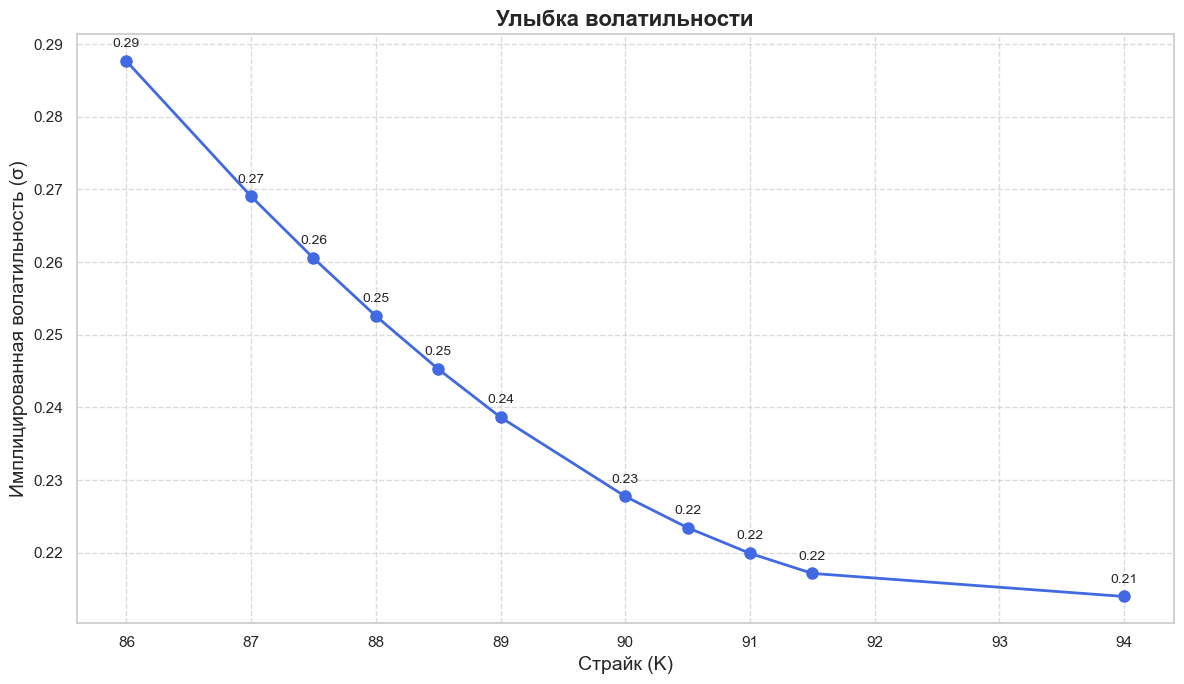

In [97]:
data = {
    'S': [89.5125] * 11,  # Цена базового актива
    'K': [float(i) for i in option_info['Цена Страйк'].to_list()],  # Страйки
    'C': [float(i) for i in option_info['SETTLEPRICE'].to_list()],  # Цены колл-опционов
    'T': 50/365  # Время до экспирации (в годах)
}
df = pd.DataFrame(data)

# --- Вычисление волатильностей ---
df['implied_vol'] = df.apply(lambda row: implied_volatility(row['S'], row['K'], row['T'], row['C']), axis=1)

# --- Построение графика улыбки волатильности ---
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
plt.plot(df['K'], df['implied_vol'], marker='o', linestyle='-', color='royalblue', markersize=8, linewidth=2)


plt.title('Улыбка волатильности', fontsize=16, fontweight='bold')
plt.xlabel('Страйк (K)', fontsize=14)
plt.ylabel('Имплицированная волатильность (σ)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

for i in range(len(df)):
    plt.annotate(f'{df["implied_vol"].iloc[i]:.2f}', 
                 (df['K'].iloc[i], df['implied_vol'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Ссылки

[Построение поаерхности, алгоритм MOEX](file:///C:/Users/User/Downloads/porjadok-rascheta-krivyh-volatilnosti.pdf)